<a href="https://colab.research.google.com/github/rafiafsan/Machine-Learning-Models/blob/main/Slary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('/content/HRDataset_v14.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [4]:
# Drop irrelevant columns for salary prediction
columns_to_drop = [
    'Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
    'EmpStatusID', 'DeptID', 'PerfScoreID', 'ManagerName', 'ManagerID',
    'LastPerformanceReview_Date'
]
df_cleaned = df.drop(columns=columns_to_drop)

# Check for missing values

missing_values = df_cleaned.isnull().sum()

df_cleaned.head(), missing_values[missing_values > 0]
df_cleaned = df_cleaned.drop(columns=['DateofTermination'])

In [5]:
df_cleaned

,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,...,TermReason,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,...,N/A-StillEmployed,Active,Production,LinkedIn,Exceeds,4.60,5,0,0,1
1,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,...,career change,Voluntarily Terminated,IT/IS,Indeed,Fully Meets,4.96,3,6,0,17
2,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,...,hours,Voluntarily Terminated,Production,LinkedIn,Fully Meets,3.02,3,0,0,3
3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,...,N/A-StillEmployed,Active,Production,Indeed,Fully Meets,4.84,5,0,0,15
4,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,...,return to school,Voluntarily Terminated,Production,Google Search,Fully Meets,5.00,4,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,65893,0,20,Production Technician II,MA,1810,05/11/85,M,Single,...,N/A-StillEmployed,Active,Production,LinkedIn,Fully Meets,4.07,4,0,0,13
307,0,48513,1,19,Production Technician I,MA,2458,05/04/82,F,Single,...,Another position,Voluntarily Terminated,Production,Google Search,PIP,3.20,2,0,5,4
308,0,220450,0,6,CIO,MA,2067,08/30/79,F,Single,...,N/A-StillEmployed,Active,IT/IS,Employee Referral,Exceeds,4.60,5,6,0,16
309,0,89292,0,9,Data Analyst,MA,2148,02/24/79,F,Single,...,N/A-StillEmployed,Active,IT/IS,Employee Referral,Fully Meets,5.00,3,5,0,11


In [6]:
df_cleaned = df.drop(columns=columns_to_drop)  # Use 'data'
missing_values = df_cleaned.isnull().sum()
print(df_cleaned.head())
print(missing_values[missing_values > 0])
df_cleaned = df_cleaned.drop(columns=['DateofTermination'])

   FromDiversityJobFairID  Salary  Termd  PositionID  \
0                       0   62506      0          19   
1                       0  104437      1          27   
2                       0   64955      1          20   
3                       0   64991      0          19   
4                       0   50825      1          19   

                   Position State   Zip       DOB Sex MaritalDesc  ...  \
0   Production Technician I    MA  1960  07/10/83  M       Single  ...   
1                   Sr. DBA    MA  2148  05/05/75  M      Married  ...   
2  Production Technician II    MA  1810  09/19/88   F     Married  ...   
3   Production Technician I    MA  1886  09/27/88   F     Married  ...   
4   Production Technician I    MA  2169  09/08/89   F    Divorced  ...   

          TermReason        EmploymentStatus         Department  \
0  N/A-StillEmployed                  Active  Production          
1      career change  Voluntarily Terminated              IT/IS   
2              ho

In [7]:
# Encode categorical columns
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

X = df_encoded.drop(columns=['Salary'])
y = df_encoded['Salary']

In [8]:
df_encoded

,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,...,RecruitmentSource_Employee Referral,RecruitmentSource_Google Search,RecruitmentSource_Indeed,RecruitmentSource_LinkedIn,RecruitmentSource_On-line Web application,RecruitmentSource_Other,RecruitmentSource_Website,PerformanceScore_Fully Meets,PerformanceScore_Needs Improvement,PerformanceScore_PIP
0,0,62506,0,19,1960,4.60,5,0,0,1,...,False,False,False,True,False,False,False,False,False,False
1,0,104437,1,27,2148,4.96,3,6,0,17,...,False,False,True,False,False,False,False,True,False,False
2,0,64955,1,20,1810,3.02,3,0,0,3,...,False,False,False,True,False,False,False,True,False,False
3,0,64991,0,19,1886,4.84,5,0,0,15,...,False,False,True,False,False,False,False,True,False,False
4,0,50825,1,19,2169,5.00,4,0,0,2,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,65893,0,20,1810,4.07,4,0,0,13,...,False,False,False,True,False,False,False,True,False,False
307,0,48513,1,19,2458,3.20,2,0,5,4,...,False,True,False,False,False,False,False,False,False,True
308,0,220450,0,6,2067,4.60,5,6,0,16,...,True,False,False,False,False,False,False,False,False,False
309,0,89292,0,9,2148,5.00,3,5,0,11,...,True,False,False,False,False,False,False,True,False,False


In [9]:
# Encode categorical columns
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

X = df_encoded.drop(columns=['Salary'])
y = df_encoded['Salary']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (e.g., Linear Regression)
from sklearn.linear_model import LinearRegression
model = LinearRegression()  # Create a Linear Regression model
model.fit(X_train, y_train)  # Train the model

# Now you can make predictions
y_pred = model.predict(X_test)

# Create and display the comparison DataFrame
df_comparison = pd.DataFrame({'Actual Salary': y_test, 'Predicted Salary': y_pred})
print(df_comparison)

     Actual Salary  Predicted Salary
290          88976      79588.443371
9            50178      82966.519783
57           83552      79258.856518
60           65729     109004.665249
25          103613      88815.442148
..             ...               ...
195          74417      70455.001133
210          68829      73736.017024
224          46799      59716.748453
158          66074      74287.138938
126          46998      56117.854045

[63 rows x 2 columns]


In [11]:
# Calculate R² Score and Mean Absolute Percentage Error (MAPE)
from sklearn.metrics import mean_absolute_percentage_error

r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
accuracy = 100 * (1 - mape)

r2, accuracy

(0.5105953930199763, 85.87463063984548)

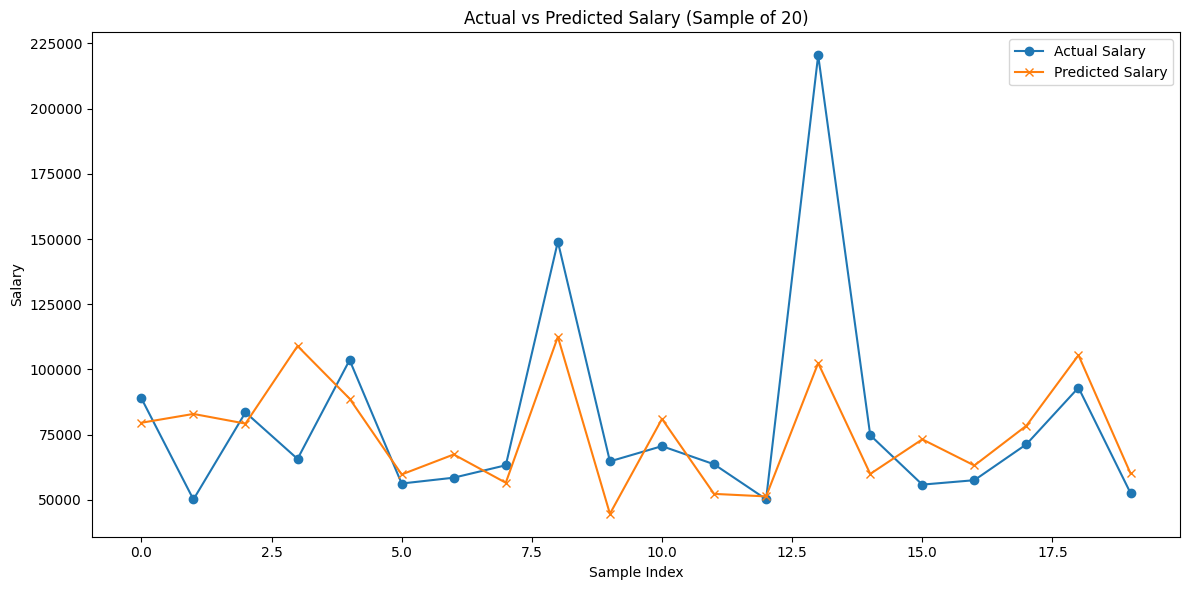

In [12]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({'Actual Salary': y_test, 'Predicted Salary': y_pred})
comparison_sample = comparison_df.head(20)

# Plot Actual vs Predicted Salaries
plt.figure(figsize=(12, 6))
plt.plot(comparison_sample['Actual Salary'].values, label='Actual Salary', marker='o')
plt.plot(comparison_sample['Predicted Salary'].values, label='Predicted Salary', marker='x')
plt.title('Actual vs Predicted Salary (Sample of 20)')
plt.xlabel('Sample Index')
plt.ylabel('Salary')
plt.legend()
plt.tight_layout()
plt.show()